In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [4]:
import pandas as pd
import numpy as np
import nltk
stopwords = nltk.corpus.stopwords.words('english')

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

from scipy.stats.stats import pearsonr

import swifter
import dask.dataframe as dd
from dask.multiprocessing import get

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
path2rawdata = '/mnt/disks/vault/wos2017-parsed/'
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')


In [5]:
title_pos_tagged_2001_2010 = "/mnt/disks/vault/analysis-data/stanford_tagger_data/pos_tagged_stanford_2001.pql"
data = pd.read_pickle(title_pos_tagged_2001_2010)

In [6]:
data.head()

,ArticleID,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,stanford_tagger_tags
31047,000261559900061,2008,Letter,FCA does not bind abscisic acid,NATURE,Nature,2008,20.0,"[(FCA, NN), (does, VBZ), (not, RB), (bind, VB), (abscisic, JJ), (acid, NN)]"
31048,000259090800017,2008,Letter,Doping: ignorance of basic statistics is all too common,NATURE,Nature,2008,0.0,"[(Doping:, NN), (ignorance, NN), (of, IN), (basic, JJ), (statistics, NNS), (is, VBZ), (all, RB), (too, RB), (common, JJ)]"
31050,000261340000041,2008,Article,Direct control of paralysed muscles by cortical neurons,NATURE,Nature,2008,133.0,"[(Direct, JJ), (control, NN), (of, IN), (paralysed, VBN), (muscles, NNS), (by, IN), (cortical, JJ), (neurons, NNS)]"
31051,000258591000018,2008,Letter,Open debate could slow flu vaccine production,NATURE,Nature,2008,0.0,"[(Open, NNP), (debate, NN), (could, MD), (slow, VB), (flu, NN), (vaccine, NN), (production, NN)]"
31054,000253671900043,2008,Article,Cyclical DNA methylation of a transcriptionally active promoter,NATURE,Nature,2008,362.0,"[(Cyclical, JJ), (DNA, NN), (methylation, NN), (of, IN), (a, DT), (transcriptionally, RB), (active, JJ), (promoter, NN)]"


In [7]:
verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']
noun_tags = ['NN','NNS','NNP','NNPS']
adjective_tags = ['JJ','JJR','JJS']

pos_tag_groups_to_check = [verb_tags, noun_tags, adjective_tags]

In [8]:
#count of verbs, nouns and adjectives in the titles


def pos_counts(parts_tagged):
    tags = [tag for (word, tag) in parts_tagged]
    
    return [len([tag for tag in tags if tag in tag_group]) for tag_group in pos_tag_groups_to_check]


    
    
test_tags = [('FCA', 'NN'), ('does', 'VBZ'), ('not', 'RB'), ('bind', 'VB'), ('abscisic', 'JJ'), ('acid', 'NN'),
            ('Cyclical', 'JJ'), ('DNA', 'NN'), ('methylation', 'NN'), ('of', 'IN')]

In [9]:
data['tag_counts'] = data['stanford_tagger_tags'].progress_apply(lambda x: pos_counts(x))

data.head()

Progress: 100%|██████████| 11940/11940 [00:00<00:00, 165809.11it/s]


,ArticleID,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,stanford_tagger_tags,tag_counts
31047,000261559900061,2008,Letter,FCA does not bind abscisic acid,NATURE,Nature,2008,20.0,"[(FCA, NN), (does, VBZ), (not, RB), (bind, VB), (abscisic, JJ), (acid, NN)]","[2, 2, 1]"
31048,000259090800017,2008,Letter,Doping: ignorance of basic statistics is all too common,NATURE,Nature,2008,0.0,"[(Doping:, NN), (ignorance, NN), (of, IN), (basic, JJ), (statistics, NNS), (is, VBZ), (all, RB), (too, RB), (common, JJ)]","[1, 3, 2]"
31050,000261340000041,2008,Article,Direct control of paralysed muscles by cortical neurons,NATURE,Nature,2008,133.0,"[(Direct, JJ), (control, NN), (of, IN), (paralysed, VBN), (muscles, NNS), (by, IN), (cortical, JJ), (neurons, NNS)]","[1, 3, 2]"
31051,000258591000018,2008,Letter,Open debate could slow flu vaccine production,NATURE,Nature,2008,0.0,"[(Open, NNP), (debate, NN), (could, MD), (slow, VB), (flu, NN), (vaccine, NN), (production, NN)]","[1, 5, 0]"
31054,000253671900043,2008,Article,Cyclical DNA methylation of a transcriptionally active promoter,NATURE,Nature,2008,362.0,"[(Cyclical, JJ), (DNA, NN), (methylation, NN), (of, IN), (a, DT), (transcriptionally, RB), (active, JJ), (promoter, NN)]","[0, 3, 2]"


In [10]:
data['verb_counts'] = data['tag_counts'].apply(lambda x: x[0])
data['noun_counts'] = data['tag_counts'].apply(lambda x: x[1])
data['adjective_counts'] = data['tag_counts'].apply(lambda x: x[2])

In [11]:
data['adjective_counts'].unique()

array([1, 2, 0, 3, 4, 5, 7, 6, 8])

In [12]:
# How does the over all distribution look like


y0 = data['verb_counts']
y1 = data['noun_counts']
y2 = data['adjective_counts']

trace0 = go.Box(
    y=y0,
    name = "Verb Counts"
)
trace1 = go.Box(
    y=y1,
    name = "Noun Counts"
)
trace2 = go.Box(
    y=y2,
    name = "Adjective Counts"
)

data_ = [trace0, trace1, trace2]
py.iplot(data_)

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [28]:
# Changes in Distributions across the years

box_data = [
    {
        'y': data['verb_counts'],
        'x': data['PubYear_x'],
        'name':'Verb',
        'marker': {
            'color': '#3D9970'
        },
        'boxmean': False,
        'orientation': 'v',
        "type": "box",
    },
    {
        'y': data['noun_counts'],
        'x': data['PubYear_x'],
        'name': 'Noun',
        'marker':{
            'color': '#FF4136',
        },
        'boxmean': False,
        'orientation': 'v',
        "type": "box",
    },
    {
        'y': data['adjective_counts'],
        'x': data['PubYear_x'],
        'name':'Adjective',
        'marker': {
            'color': '#FF851B',
        },
        'boxmean': False,
        'orientation': 'v',
        "type": "box",
    }
]
layout = {
    'xaxis': {
        'title': 'Year',
        'zeroline': False,
        'tickvals':list(range(2001,2011))
    },
    'yaxis' : {
        'title': 'Count',
        'zeroline': False,
        'tickvals':list(range(0,14))
    },
    'boxmode': 'group',
    'title' : 'Yearly variations in POS Distributions'
    
}
fig = go.Figure(data=box_data, layout=layout)

py.iplot(fig)

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [65]:
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))

Progress: 100%|██████████| 11940/11940 [00:00<00:00, 70658.40it/s]


In [66]:
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))

data_Yearwise = [data[data.PubYear_x == year] for year in range(2001, 2011)]

Progress: 100%|██████████| 11940/11940 [00:00<00:00, 60087.94it/s]


Text(0.5,1,'2009')

<Figure size 432x288 with 0 Axes>

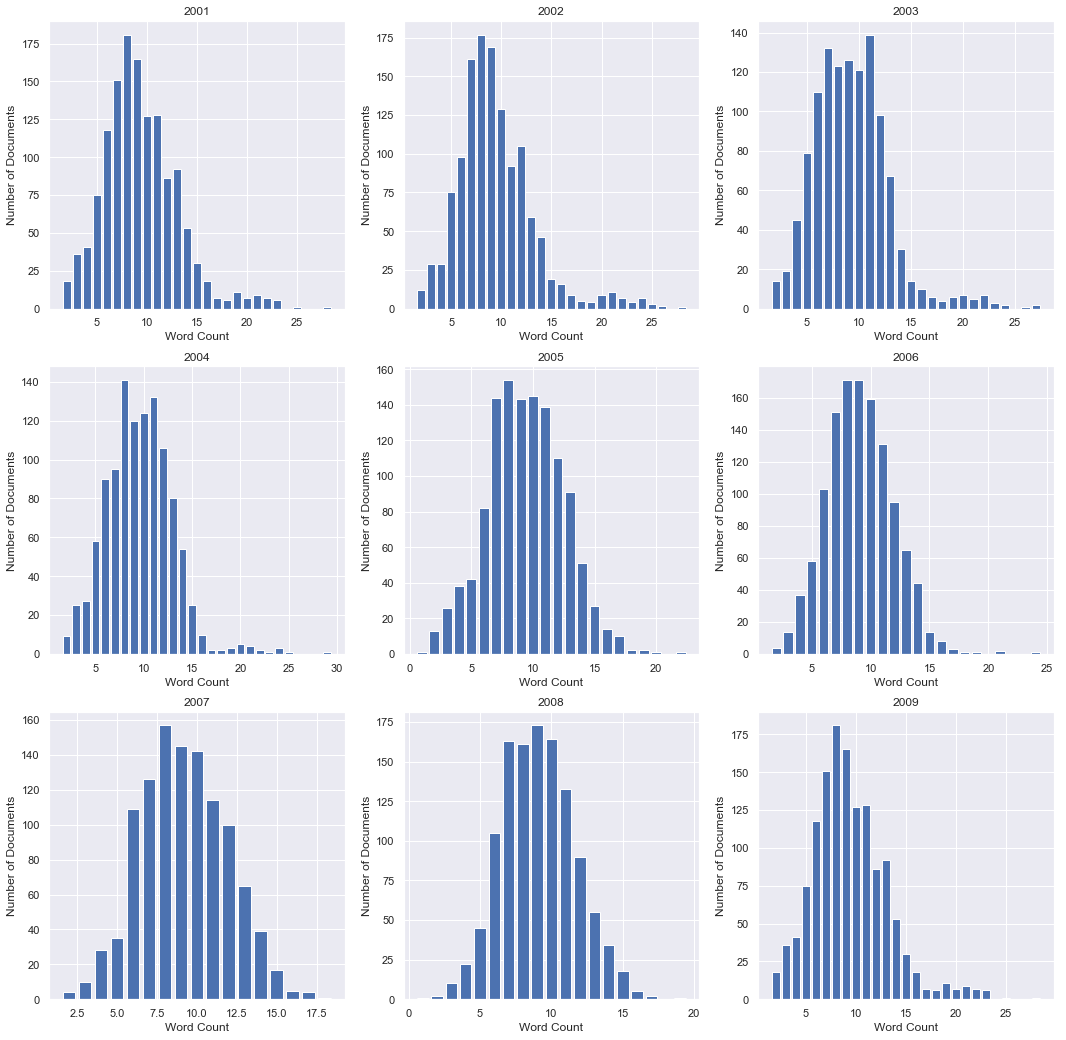

In [82]:
# Average character, word and cleaned title word counts over the years
f1 = plt.figure()
f1 = plt.figure(figsize=(18,18))


ax1 = f1.add_subplot(331)
_tmp = data_Yearwise[0]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2001")

ax1 = f1.add_subplot(332)
_tmp = data_Yearwise[1]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2002")


ax1 = f1.add_subplot(333)
_tmp = data_Yearwise[2]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2003")


ax1 = f1.add_subplot(334)
_tmp = data_Yearwise[3]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2004")


ax1 = f1.add_subplot(335)
_tmp = data_Yearwise[4]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2005")


ax1 = f1.add_subplot(336)
_tmp = data_Yearwise[5]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2006")


ax1 = f1.add_subplot(337)
_tmp = data_Yearwise[6]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2007")


ax1 = f1.add_subplot(338)
_tmp = data_Yearwise[7]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2008")


ax1 = f1.add_subplot(339)
_tmp = data_Yearwise[0]
tmp = _tmp.groupby('word_count').size().reset_index(name="count")
ax1.bar(tmp['word_count'], 
         tmp['count'])
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Number of Documents")
ax1.set_title("2009")
